<a href="https://colab.research.google.com/github/darknight11345/turtlebot4/blob/main/Text_21_01_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd


'/content'

In [2]:
!pip install fsspec==2024.10.0


  Using cached fsspec-2024.10.0-py3-none-any.whl.metadata (11 kB)
Using cached fsspec-2024.10.0-py3-none-any.whl (179 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.9.0
    Uninstalling fsspec-2024.9.0:
      Successfully uninstalled fsspec-2024.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.2.0 requires fsspec[http]<=2024.9.0,>=2023.1.0, but you have fsspec 2024.10.0 which is incompatible.


In [3]:
!pip install simpletransformers

  Using cached fsspec-2024.9.0-py3-none-any.whl.metadata (11 kB)
Using cached fsspec-2024.9.0-py3-none-any.whl (179 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [27]:
import pandas as pd
data = pd.read_csv("ner_dataset_with_head_towards_and_noise_20_01_25.csv",encoding="latin1", delimiter="," )

In [5]:
print("Columns in the CSV:", data.columns)

Columns in the CSV: Index(['Sentence_ID', 'Sentence', 'Labels'], dtype='object')


In [6]:
data.head(30)

,Sentence_ID,Sentence,Labels
0,1,Navigate to ICU with Aspirin.,ACTION;O;LOCATION;O;O
1,2,Navigate to reception with Tylenol.,ACTION;O;LOCATION;O;O
2,3,Bring Aspirin to Room 424.,ACTION;O;O;O;O
3,4,Move to Room 117 with Paracetamol.,ACTION;O;B-location;I-location;O;O
4,5,Room to with Proceed Aspirin. 595,O;O;O;ACTION;O;O
5,6,with ICU to Tylenol. Move,O;LOCATION;O;O;ACTION
6,7,Deliver Ibuprofen to Room 322.,ACTION;O;O;O;O
7,8,Deliver Aspirin drop to Room 217.,ACTION;O;O;O;O;O
8,9,Deliver Aspirin to ICU.,ACTION;O;O;O
9,10,Go to ICU with Tylenol.,ACTION;O;LOCATION;O;O


In [28]:
data.rename(columns={"Sentence_ID":"sentence_id","Sentence":"sentences","Labels":"labels"}, inplace =True)

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
#Sentence_ID,Sentence,Labels


# Splitting the data into features (X) and labels (y)
X = data[["sentence_id","sentences"] ] # The sentences
y = data["labels"]    # The labels

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Now you can use X_train, y_train for training and X_test, y_test for testing


In [29]:
X_train.head(10)

#train_data=pd.DataFrame(X_train)

,sentence_id,sentences
968,969,Move to Room 289 with Paracetamol.
240,241,Move to Room 254 with Penicillin.
819,820,Take Ibuprofen to ICU.
692,693,Send Aspirin to Room 390.
420,421,Bring Penicillin to ICU.
1085,1086,Send Antibiotics to ICU.
1998,1999,Transport Paracetamol to Room 156.
365,366,Send ICU Antibiotics to Room 574.
1022,1023,Go to Room 494 with Antibiotics.
1240,1241,Proceed to Room 426 with Penicillin.


In [30]:
y_train.head(10)

,labels
968,ACTION;O;B-location;I-location;O;O
240,ACTION;O;B-location;I-location;O;O
819,ACTION;O;O;O
692,ACTION;O;O;O;O
420,ACTION;O;O;O
1085,ACTION;O;O;O
1998,ACTION;O;O;O;O
365,ACTION;LOCATION;O;O;O;O
1022,ACTION;O;B-location;I-location;O;O
1240,ACTION;O;B-location;I-location;O;O


In [12]:
# Function to reconstruct the DataFrame with sentence_id, splitting sentences and labels
def reconstruct_dataframe(data, labels):
    """
    Reconstructs a DataFrame with sentence_id, words, and labels.

    Args:
        data (pd.DataFrame): A DataFrame containing 'sentence_id' and 'sentences'.
        labels (list): A list of label strings, where each string contains labels separated by ';'.

    Returns:
        pd.DataFrame: A DataFrame with columns ['sentence_id', 'words', 'labels'].
    """
    reconstructed_data = []
    for i, (sentence_id, sentence, label) in enumerate(zip(data['sentence_id'], data['sentences'], labels), start=1):
        # Split the sentence into words and labels into a list
        words = sentence.split()  # Words split by spaces
        label_list = label.split(";")  # Labels split by ';'

        # Ensure the number of words matches the number of labels
        if len(words) != len(label_list):
            raise ValueError(
                f"Mismatch in number of words and labels at sentence_id {sentence_id}: "
                f"{len(words)} words, {len(label_list)} labels"
            )

        # Append data
        for word, lbl in zip(words, label_list):
            reconstructed_data.append({
                "sentence_id": sentence_id,
                "words": word,
                "labels": lbl
            })

    return pd.DataFrame(reconstructed_data)

# Example usage
# Assuming X_train contains columns 'sentence_id' and 'sentences'
train_data_1 = reconstruct_dataframe(X_train, y_train)
test_data_1 = reconstruct_dataframe(X_test, y_test)

# Inspect reconstructed data
print(train_data_1.head())
print(train_data_1.shape)
print(test_data_1.shape)


   sentence_id words      labels
0          969  Move      ACTION
1          969    to           O
2          969  Room  B-location
3          969   289  I-location
4          969  with           O
(7984, 3)
(1999, 3)


In [31]:
import string

# Function to clean words by removing punctuation
def clean_words(sentence):
    return sentence.translate(str.maketrans("", "", string.punctuation))

# Apply cleaning to words in the dataset
train_data_1['words'] = train_data_1['words'].apply(clean_words)
test_data_1['words'] = test_data_1['words'].apply(clean_words)

In [14]:
#building up train data and test data
train_data = pd.DataFrame({"sentence_id":train_data_1["sentence_id"],"words":train_data_1["words"],"labels":train_data_1["labels"]})
test_data = pd.DataFrame({"sentence_id":test_data_1["sentence_id"],"words":test_data_1["words"],"labels":test_data_1["labels"]})

In [15]:
test_data.head(10)

,sentence_id,words,labels
0,1861,Take,ACTION
1,1861,Paracetamol,O
2,1861,to,O
3,1861,reception,O
4,354,Send,ACTION
5,354,customer,O
6,354,Antibiotics,O
7,354,to,O
8,354,ICU,O
9,1334,Transport,ACTION


In [ ]:
#X= data[["sentence_id","words"]]
#Y =data["labels"]

<ipython-input-16-00a191769821>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


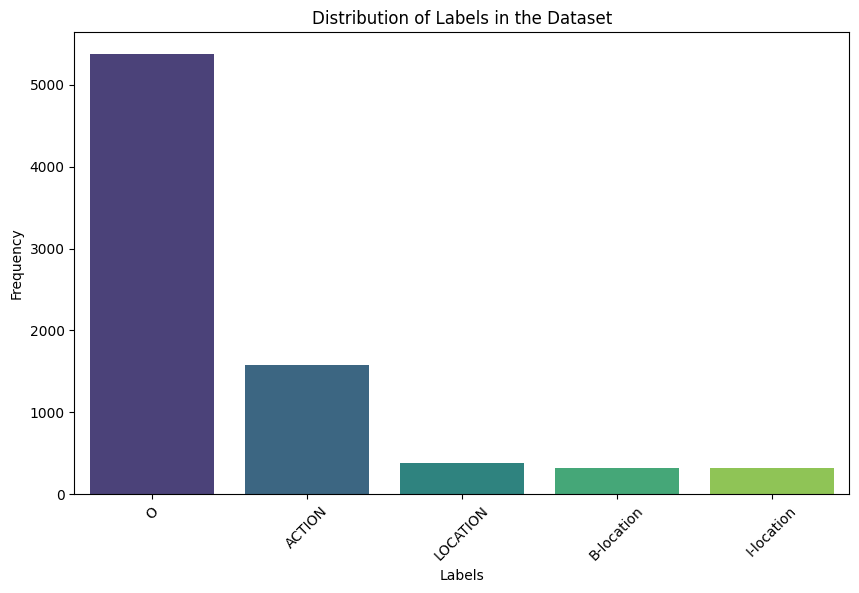

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Assuming your data is in the form of a DataFrame named 'data'
# For example, 'data' has 'Label' column with different labels like 'ACTION', 'O', 'LOCATION'

# Count the frequency of each label
label_counts = train_data['labels'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [35]:
#Model Training
train_data

,sentence_id,words,labels
0,969,Move,ACTION
1,969,to,O
2,969,Room,B-location
3,969,289,I-location
4,969,with,O
...,...,...,...
7979,1127,Navigate,ACTION
7980,1127,to,O
7981,1127,RECEPTION,LOCATION
7982,1127,with,O


In [17]:

!pip install torch  --index-url https://download.pytorch.org/whl/cu124


Looking in indexes: https://download.pytorch.org/whl/cu124


In [18]:
from simpletransformers.ner import NERModel,NERArgs

In [19]:
label = train_data["labels"].unique().tolist()
label

['ACTION', 'O', 'B-location', 'I-location', 'LOCATION']

In [38]:
# Get the unique sentence ids
unique_sentences = train_data["sentence_id"].unique()

# Count the number of unique sentences
num_unique_sentences = len(unique_sentences)

# Print the count of unique sentences
print(f"The number of unique sentences is: {num_unique_sentences}")


The number of unique sentences is: 1600


In [20]:
args = NERArgs()
args.num_train_epochs = 1
args.learning_rate = 1e-4
args.overwrite_output_dir = True
args.train_batch_size = 32
args.eval_batch_size = 32
args.gradient_accumulation_steps = 4
args.max_seq_length = 128
args.fp16 = True  # Enable mixed precision
#args.n_gpu = 2  # Set based on the number of GPUs
args.local_rank = -1
args.gradient_checkpointing = True  # Reduce memory usage
args.scheduler = "linear_schedule_with_warmup"
args.warmup_steps = 500  # Adjust based on your total steps
args.use_early_stopping = True
args.early_stopping_patience = 3
args.evaluate_during_training = True
args.evaluate_during_training_steps = 1000
args.dataloader_num_workers = 2  # Adjust based on your CPU resources


In [21]:
model = NERModel('bert', 'bert-base-uncased',labels=label,args =args, use_cuda=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
#train_data.shape
#test_data.shape
print(train_data.dtypes)
print(test_data.dtypes)


sentence_id     int64
words          object
labels         object
dtype: object
sentence_id     int64
words          object
labels         object
dtype: object


In [33]:
#test with sample
# Sample 100 rows from train_data and 20 rows from test_data
train_sample = train_data.sample(n=100, random_state=42)  # Adjust the size as needed
test_sample = test_data.sample(n=20, random_state=42)

print(train_sample.shape)
print(test_sample.shape)


(100, 3)
(20, 3)


In [34]:
train_sample

,sentence_id,words,labels
5013,1745,with,O
1055,1058,Antibiotics,O
4012,1143,Proceed,ACTION
1731,469,518,I-location
6147,822,437,O
...,...,...,...
1483,1088,215,I-location
3322,365,RECEPTION,LOCATION
3193,1044,to,O
5385,120,ICU,O


      sentence_id        words           labels
5013         1745         with  [0, 0, 0, 0, 1]
1055         1058  Antibiotics  [0, 0, 0, 0, 1]
4012         1143      Proceed  [1, 0, 0, 0, 0]
1731          469          518  [0, 0, 1, 0, 0]
6147          822          437  [0, 0, 0, 0, 1]
      sentence_id    words           labels
256           248  Deliver  [1, 0, 0, 0, 0]
352          1454     with  [0, 0, 0, 0, 1]
298           362     with  [0, 0, 0, 0, 1]
581          1104  Aspirin  [0, 0, 0, 0, 1]
1288         1898     with  [0, 0, 0, 0, 1]


In [ ]:
#test with sample
output_dir = "./best_model"

#model.train_model(train_sample,  eval_data=test_sample, acc=accuracy_score, save_best_model=True, output_dir=output_dir)


import logging
from simpletransformers.ner import NERModel
from sklearn.metrics import accuracy_score

# Setup logging
log_file = "train_log.txt"
logging.basicConfig(filename=log_file, level=logging.DEBUG, format="%(asctime)s - %(message)s")
logging.info("Training started.")

# Train model function with logging
try:
    output_dir = "./best_model"
    logging.info(f"Training the model with output directory: {output_dir}")

    # Log training data size
    logging.info(f"Training data size: {len(train_sample)}")
    logging.info(f"Test data size: {len(test_sample)}")

    # Training the model
    model.train_model(train_sample, eval_data=test_sample, acc=accuracy_score, save_best_model=True, output_dir=output_dir)

    logging.info("Training completed successfully.")

except Exception as e:
    logging.error(f"Error during training: {str(e)}")
    raise  # Re-raise the exception after logging it


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/4 [00:00<?, ?it/s]

In [48]:
output_dir = "./best_model"

model.train_model(train_data, eval_data=test_data, acc=accuracy_score, save_best_model=True, output_dir=output_dir)

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

ValueError: You appear to be using a legacy multi-label data representation. Sequence of sequences are no longer supported; use a binary array or sparse matrix instead - the MultiLabelBinarizer transformer can convert to this format.

IndexError: positional indexers are out-of-bounds

In [ ]:
import torch

# Save the model's state_dict (weights only)
torch.save(model.model.state_dict(), "model_weights.pth")

In [ ]:
result, model_outputs, preds_list = model.eval_model(test_data)

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/41 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: LOCATION seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: MEDICINE seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ACTION seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


In [ ]:
result

{'eval_loss': 0.4864750762538212,
 'precision': 0.6097308488612836,
 'recall': 0.6746849942726232,
 'f1_score': 0.6405655247417075}

In [ ]:
prediction, model_output = model.predict(["deliver tablets to room 102"])

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
prediction

[[{'deliver': 'O'},
  {'tablets': 'O'},
  {'to': 'O'},
  {'102': 'O'},
  {'room': 'O'}]]

In [ ]:
import torch

training_args = torch.load("./outputs/training_args.bin")

# Print or inspect the contents
print(training_args)


NERArgs(adafactor_beta1=None, adafactor_clip_threshold=1.0, adafactor_decay_rate=-0.8, adafactor_eps=(1e-30, 0.001), adafactor_relative_step=True, adafactor_scale_parameter=True, adafactor_warmup_init=True, adam_betas=(0.9, 0.999), adam_epsilon=1e-08, best_model_dir='outputs/best_model', cache_dir='cache_dir/', config={}, cosine_schedule_num_cycles=0.5, custom_layer_parameters=[], custom_parameter_groups=[], dataloader_num_workers=0, do_lower_case=False, dynamic_quantize=False, early_stopping_consider_epochs=False, early_stopping_delta=0, early_stopping_metric='eval_loss', early_stopping_metric_minimize=True, early_stopping_patience=3, encoding=None, eval_batch_size=32, evaluate_during_training=False, evaluate_during_training_silent=True, evaluate_during_training_steps=2000, evaluate_during_training_verbose=False, evaluate_each_epoch=True, fp16=False, gradient_accumulation_steps=4, learning_rate=0.0001, local_rank=-1, logging_steps=50, loss_type=None, loss_args={}, manual_seed=None, ma

<ipython-input-34-91d6a9a137b6>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  training_args = torch.load("./outputs/training_args.bin")
